In [70]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Modified RMET

In [71]:
modified_rmet = pd.DataFrame()

In [72]:
files = os.listdir()
text_files = [file for file in files if file.endswith('.txt')]

In [73]:
for file in text_files:
    with open(file, 'r') as f:
        responses = [line.strip().split(': ')[1] for line in f.readlines()]
        modified_rmet[file.split('.')[0]] = responses

In [74]:
len(text_files)

20

In [75]:
modified_rmet.head()

,B455,B457,B458,B459,B460,B462,B464,B465,B468,B469,B470,B472,B474,B477,B478,B480,B484,b489,B493,BL_test
0,no response,bored,comforting,playful,no response,playful,comforting,no response,playful,no response,playful,no response,playful,playful,no response,playful,comforting,irritated,comforting,playful
1,upset,upset,upset,annoyed,terrified,upset,upset,terrified,upset,upset,terrified,upset,upset,upset,upset,no response,no response,upset,no response,terrified
2,desire,desire,desire,no response,desire,desire,desire,desire,no response,desire,desire,no response,desire,no response,joking,desire,flustered,desire,flustered,joking
3,no response,no response,insisting,amused,insisting,insisting,amused,no response,amused,no response,amused,insisting,insisting,joking,amused,insisting,insisting,insisting,insisting,joking
4,worried,irritated,worried,sarcastic,no response,sarcastic,worried,worried,worried,irritated,worried,no response,worried,worried,worried,worried,worried,worried,no response,irritated


In [76]:
answer_file = '../../task_materials/answers.txt'
with open(answer_file, 'r') as f:
    answers = [line.strip().split(', ')[0] for line in f.readlines()]

In [77]:
modified_correct = modified_rmet.copy()
for ppt in modified_correct.columns:
    modified_correct[ppt] = [1 if modified_correct[ppt][i] == answers[i] else 0 for i in range(len(answers))]

In [78]:
modified_correct.head()

,B455,B457,B458,B459,B460,B462,B464,B465,B468,B469,B470,B472,B474,B477,B478,B480,B484,b489,B493,BL_test
0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,0,1
1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,0
2,1,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,0,1,0,0
3,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,0
4,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,0


In [79]:
num_correct = modified_correct.sum(axis=0)

In [80]:
num_correct.mean()

15.7

In [81]:
reg_correct = modified_correct[:12].sum(axis=0)
reg_correct.mean()

6.65

In [82]:
upsideDown_correct = modified_correct[12:24].sum(axis=0)
upsideDown_correct.mean()

3.7

In [83]:
scrambled_correct = modified_correct[24:36].sum(axis=0)
scrambled_correct.mean()

5.35

In [84]:
full_data = pd.concat((reg_correct, upsideDown_correct, scrambled_correct), axis=1)
full_data.columns = ["regular", "upsideDown", "scrambled"]
full_data = full_data.T
full_data

,B455,B457,B458,B459,B460,B462,B464,B465,B468,B469,B470,B472,B474,B477,B478,B480,B484,b489,B493,BL_test
regular,7,9,9,6,5,9,9,6,6,5,7,5,9,7,4,7,5,8,3,7
upsideDown,3,5,8,2,4,7,1,1,5,4,3,2,3,2,1,5,1,5,4,8
scrambled,6,9,6,4,8,7,2,5,4,4,7,6,5,5,2,3,5,6,2,11


In [85]:
average_full_data = full_data.mean(axis=1)

<BarContainer object of 3 artists>

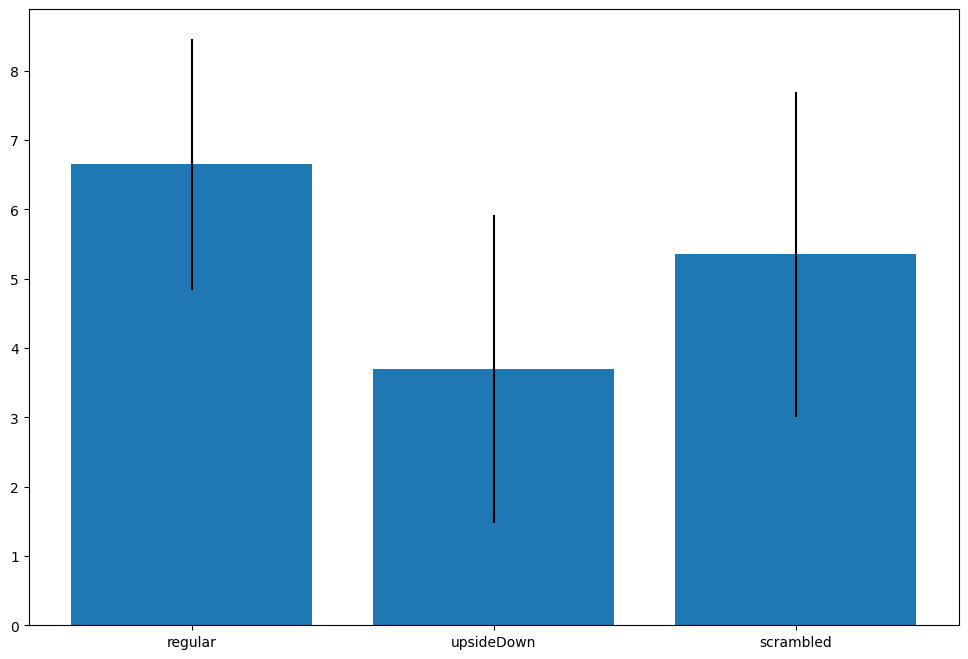

In [86]:
plt.figure(figsize=(12,8))

# Plot average_full_data as a bar chart with standard deviation error bars
plt.bar(average_full_data.index, average_full_data, yerr=full_data.std(axis=1))

## Old RMET Vs new images

In [87]:
original_rmet = pd.DataFrame()
original_files = os.listdir('original')
original_text_files = [file for file in original_files if file.endswith('.txt')]

In [88]:
for file in original_text_files:
    with open(f"original/{file}", 'r') as f:
        responses = [line.strip().split(': ')[1] for line in f.readlines()]
        original_rmet[file.split('.')[0]] = responses

In [89]:
original_correct = original_rmet.copy()
for ppt in original_correct.columns:
    original_correct[ppt] = [1 if original_correct[ppt][i] == answers[i] else 0 for i in range(len(answers))]

In [90]:
original_correct.head()

,B485-original,B494-original,B496-original,B497-original,B499-original,B503-original,B505-original,B506-original,B509-original,B512-original,B513-original,B514-original,B517-original,B518-original,B519-original,B523-original,B524-original
0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1
1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0
2,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
3,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1
4,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1


In [91]:
original_correct.sum()

B485-original    28
B494-original    27
B496-original    24
B497-original    31
B499-original    27
B503-original    28
B505-original    26
B506-original    26
B509-original    30
B512-original    24
B513-original    21
B514-original    31
B517-original    27
B518-original    23
B519-original    22
B523-original    24
B524-original    23
dtype: int64

In [92]:
original_correct.sum().mean()

26.0

In [93]:
new_rmet = pd.DataFrame()
new_files = os.listdir('newimages')
new_text_files = [file for file in new_files if file.endswith('.txt')]

In [94]:
for file in new_text_files:
    with open(f"newimages/{file}", 'r') as f:
        responses = [line.strip().split(': ')[1] for line in f.readlines()]
        new_rmet[file.split('.')[0]] = responses

In [95]:
new_correct = new_rmet.copy()
for ppt in new_correct.columns:
    new_correct[ppt] = [1 if new_correct[ppt][i] == answers[i] else 0 for i in range(len(answers))]

In [96]:
new_correct.head()

,B485-newimages,B492-newimages,B494-newimages,B496-newimages,B497-newimages,B499-newimages,B503-newimages,B505-newimages,B506-newimages,B509-newimages,B512-newimages,B513-newimages,B514-newimages,B517-newimages,B518-newimages,B519-newimages,B523-newimages,B524-newimages
0,1,0,1,0,1,1,1,1,1,0,0,1,1,0,0,1,1,1
1,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0
4,1,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1


In [97]:
new_correct.sum()

B485-newimages    26
B492-newimages    25
B494-newimages    23
B496-newimages    23
B497-newimages    24
B499-newimages    26
B503-newimages    21
B505-newimages    20
B506-newimages    19
B509-newimages    21
B512-newimages    20
B513-newimages    23
B514-newimages    26
B517-newimages    17
B518-newimages    22
B519-newimages    19
B523-newimages    21
B524-newimages    19
dtype: int64

In [98]:
new_correct.sum().mean()

21.944444444444443